# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab, you will use the titanic dataset to see the impact of tree pruning and hyperparameter tuning on the predictive performance of a decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide much predictive power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. 

## Objectives

In this lab you will: 

- Determine the optimal hyperparameters for a decision tree model and evaluate the model performance

## Import necessary libraries

Let's first import the libraries you'll need for this lab. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn')

## Import the data

The titanic dataset, available in `'titanic.csv'`, is all cleaned up and preprocessed for you so that you can focus on pruning and optimization. Import the dataset and print the first five rows of the data: 

In [2]:
# Import the data
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,1
3,4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,1
4,5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


## Create training and test sets

- Assign the `'Survived'` column to `y` 
- Drop the `'Survived'` and `'PassengerId'` columns from `df`, and assign the resulting DataFrame to `X` 
- Split `X` and `y` into training and test sets. Assign 30% to the test set and set the `random_state` to `SEED` 

In [3]:
# Create X and y 
X = df.drop('Survived', axis=1)
y = df.Survived

# Split into training and test sets
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=SEED)

## Train a vanilla classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Instantiate a decision tree 
  - Use the `'entropy'` criterion and set the `random_state` to `SEED` 
- Fit this classifier to the training data 

In [4]:
# Train the classifier using training data
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under the curve) to check the predictive performance

In [5]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.729156010230179

## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree: 

- Create an array for `max_depth` values ranging from 1 - 32  
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results 

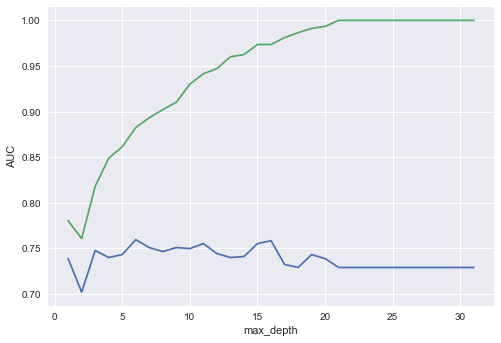

In [23]:
# Identify the optimal tree depth for given data
max_depth_range = np.arange(1,32,1)

aucs_test = []
aucs_train = []

for max_depth in max_depth_range:
    dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED, max_depth=max_depth)
    dt.fit(X_train, y_train)
    
    # calculate AUC for test
    y_pred_test = dt.predict(X_test)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
    roc_auc_test = auc(fpr_test, tpr_test)
    aucs_test.append(roc_auc_test)
    
    # calculate AUC for train
    y_pred_train = dt.predict(X_train)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
    roc_auc_train = auc(fpr_train, tpr_train)
    aucs_train.append(roc_auc_train)
    
fig, ax = plt.subplots()
ax.plot(max_depth_range, aucs_test, label='Testing AUC')
ax.plot(max_depth_range, aucs_train, label='Training AUC')
ax.set_xlabel('max_depth')
ax.set_ylabel('AUC');

In [12]:
# Your observations here 

# Considering both maximizing Testing AUC and minimizing difference between Training & Testing AUC,
# the most optimal max_depth seems to be around 3-3.5

## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree 

- Create an array for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

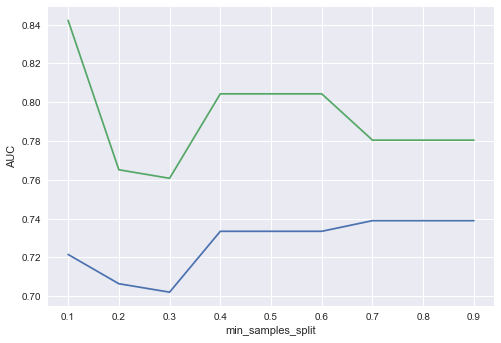

In [24]:
# Identify the optimal min-samples-split for given data
min_samples_split_range = np.arange(0.1, 1, 0.1)

aucs_test = []
aucs_train = []

for min_samples_split in min_samples_split_range:
    dt = DecisionTreeClassifier(criterion='entropy', 
                                random_state=SEED, 
                                min_samples_split=min_samples_split)
    # fit to training data
    dt.fit(X_train, y_train)
    
    # calculate AUC for test
    y_pred_test = dt.predict(X_test)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
    roc_auc_test = auc(fpr_test, tpr_test)
    aucs_test.append(roc_auc_test)
    
    # calculate AUC for train
    y_pred_train = dt.predict(X_train)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
    roc_auc_train = auc(fpr_train, tpr_train)
    aucs_train.append(roc_auc_train)
    
fig, ax = plt.subplots()
ax.plot(min_samples_split_range, aucs_test, label='Testing AUC')
ax.plot(min_samples_split_range, aucs_train, label='Training AUC')
ax.set_xlabel('min_samples_split')
ax.set_ylabel('AUC');

In [ ]:
# Your observations here
# Training & Tesing AUC appear to stabilize starting at min_samples_split of 0.7

## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree 

- Create an array for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

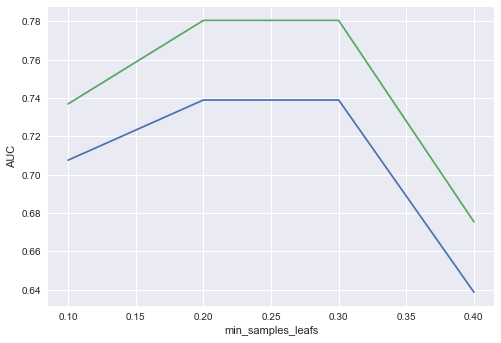

In [25]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs_range = np.arange(0.1, 0.5, 0.1)

aucs_test = []
aucs_train = []

for val in min_samples_leafs_range:
    dt = DecisionTreeClassifier(criterion='entropy', 
                                random_state=SEED, 
                                min_samples_leaf=val)
    # fit to training data
    dt.fit(X_train, y_train)
    
    # calculate AUC for test
    y_pred_test = dt.predict(X_test)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
    roc_auc_test = auc(fpr_test, tpr_test)
    aucs_test.append(roc_auc_test)
    
    # calculate AUC for train
    y_pred_train = dt.predict(X_train)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
    roc_auc_train = auc(fpr_train, tpr_train)
    aucs_train.append(roc_auc_train)
    
fig, ax = plt.subplots()
ax.plot(min_samples_leafs_range, aucs_test, label='Testing AUC')
ax.plot(min_samples_leafs_range, aucs_train, label='Training AUC')
ax.set_xlabel('min_samples_leafs')
ax.set_ylabel('AUC');

In [ ]:
# Your observations here 

# Both Training and Testing AUC seem to get to their peaks starting at min_samples_leafs of 0.2.
# They stabilize when min_samples_leafs is within 0.2 and 0.3, and then both start to drop
# as we increase min_samples_leafs further

## Maximum Features

Now check for the best `max_features` parameter value for our decision tree 

- Create an array for `max_features` values ranging from 1 - 12 (1 feature vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

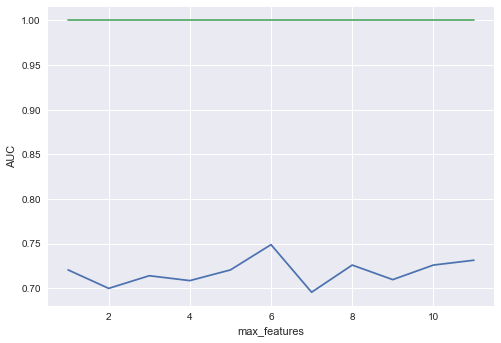

In [26]:
# Find the best value for optimal maximum feature size
features_range = np.arange(1,12)

aucs_test = []
aucs_train = []

for val in features_range:
    dt = DecisionTreeClassifier(criterion='entropy', 
                                random_state=SEED, 
                                max_features=val)
    # fit to training data
    dt.fit(X_train, y_train)
    
    # calculate AUC for test
    y_pred_test = dt.predict(X_test)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
    roc_auc_test = auc(fpr_test, tpr_test)
    aucs_test.append(roc_auc_test)
    
    # calculate AUC for train
    y_pred_train = dt.predict(X_train)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
    roc_auc_train = auc(fpr_train, tpr_train)
    aucs_train.append(roc_auc_train)
    
fig, ax = plt.subplots()
ax.plot(features_range, aucs_test, label='Testing AUC')
ax.plot(features_range, aucs_train, label='Training AUC')
ax.set_xlabel('max_features')
ax.set_ylabel('AUC');

In [19]:
# Your observations here
# max_feature within selected range does not seem to have any effect on Training AUC (stays the same at 1)
# Testing AUC seems to hit its highest point at max_features of 6, and 
# it does not seem to improve as max_features goes beyond that point

## Re-train the classifier with chosen values

Now we will use the best values from each training phase above and feed it back to our classifier. Then we can see if there is any improvement in predictive performance. 

- Train the classifier with the optimal values identified 
- Compare the AUC of the new model with the earlier vanilla decision tree AUC 
- Interpret the results of the comparison

In [27]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy',
                           random_state=SEED,
                           max_depth=3,
                           min_samples_split=0.7,
                           min_samples_leaf=0.2,
                           max_features=6)
dt.fit(X_train, y_train)
y_pred_test = dt.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7389599317988065

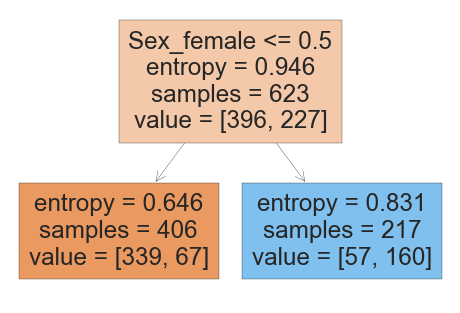

In [31]:
# Your observations here
from sklearn import tree
tree.plot_tree(dt, filled=True, feature_names=X.columns);

In [ ]:
# Tuning hyperparameters in this case only improves Testing AUC by a small amount 
# (from 0.729156010230179 to 0.7389599317988065). 

# Also, instead of using separate validation dataset for tuning and tweaking, we're using testing data,
# which is not the correct way of doing it.

In the next section, we shall talk about hyperparameter tuning using a technique called "grid-search" to make this process even more granular and decisive. 

## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid overfitting and increasing the generalization capabilities of the classifier. For the titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 